# Introduction

In [10]:
from skimage.color import rgb2gray
import skimage.transform
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
import skimage.exposure
from typing import Dict

<Figure size 640x480 with 0 Axes>

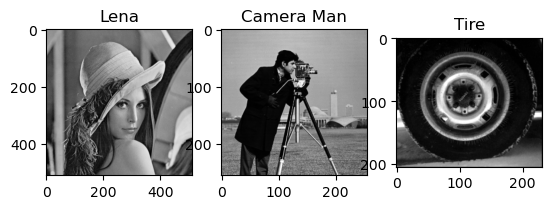

In [11]:
plt.gray() # makes image plots grayscale

lena = rgb2gray(imread('lena.tiff')) * 255
cameraman = imread('cameraman.tiff').astype(np.float64)
tire = imread('tire.tiff').astype(np.float64) / 255.0

def plot_images(images: Dict[str, np.ndarray], title=None):
    """Plots all images in a row"""
    fig = plt.figure()
    for index, (subtitle, image) in enumerate(images.items(), 1):
        ax = fig.add_subplot(1, len(images), index)
        ax.imshow(image)
        ax.title.set_text(subtitle)
    if title:
        fig.suptitle(title)
    plt.show()

plot_images({'Lena': lena, 'Camera Man': cameraman, 'Tire': tire}, 'Original Images')

In [12]:
def PSNR(f: np.ndarray, reference: np.ndarray, MAX_f=255.0):
    """Computes the peak signal-to-noise ratio (PSNR) between two images."""
    f, reference = f.astype(np.float64), reference.astype(np.float64)
    MSE = np.mean((f - reference)**2)
    PSNR_out = 10 * np.log10(MAX_f**2 / MSE)
    return PSNR_out

# Downsampling

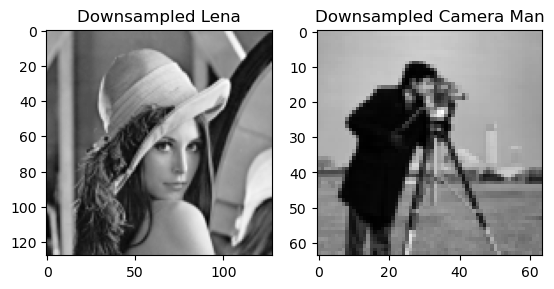

In [13]:
def downsample(f: np.ndarray, step=4, order=1) -> np.ndarray:
    assert len(f.shape) == 2, "Only support 2 dimension arrays"
    new_width = f.shape[0] // step
    new_height = f.shape[1] // step
    # Order shouldn't matter if the shape is divisible by `step` on both axes
    return skimage.transform.resize(f, (new_width, new_height), order=order)
lena_down = downsample(lena)
camera_down = downsample(cameraman)
# Plot
plot_images({'Downsampled Lena': lena_down, 'Downsampled Camera Man': camera_down})


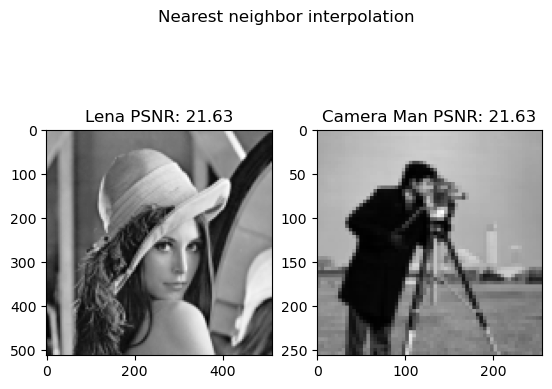

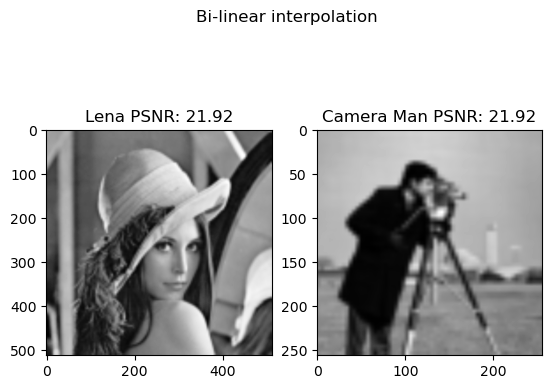

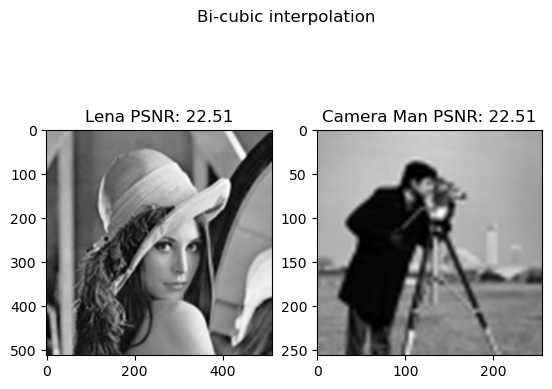

In [14]:
# Upscaling (earest neighbor interpolation, bilinear interpolation, bicubic interpolation)

def upscale(f: np.ndarray, order: int, step=4) -> np.ndarray:
    assert len(f.shape) == 2, "Only support 2 dimension arrays"
    new_width = f.shape[0] * step
    new_height = f.shape[1] * step
    return skimage.transform.resize(f, (new_width, new_height), order=order)


lena_up_0, camera_up_0 = upscale(lena_down, 0), upscale(camera_down, 0)
lena_up_1, camera_up_1 = upscale(lena_down, 1), upscale(camera_down, 1)
lena_up_3, camera_up_3 = upscale(lena_down, 3), upscale(camera_down, 3)

# Plot
plot_images({f'Lena PSNR: {PSNR(camera_up_0, cameraman):.2f}': lena_up_0, f'Camera Man PSNR: {PSNR(camera_up_0, cameraman):.2f}': camera_up_0}, 'Nearest neighbor interpolation')
plot_images({f'Lena PSNR: {PSNR(camera_up_1, cameraman):.2f}': lena_up_1, f'Camera Man PSNR: {PSNR(camera_up_1, cameraman):.2f}': camera_up_1}, 'Bi-linear interpolation')
plot_images({f'Lena PSNR: {PSNR(camera_up_3, cameraman):.2f}': lena_up_3, f'Camera Man PSNR: {PSNR(camera_up_3, cameraman):.2f}': camera_up_3}, 'Bi-cubic interpolation')

1. What can you observed about the up-sampled images produced by each of the methods?

Up-sampling via interpolation has blurred the images. Information was losted during downsampling, 

2. How do the different methods compare to each other in terms of PSNR as well as visual quality? Why?

An increased order interpolation "smooths" the transitions between original pixels more. Visually, this results in a less grainy, but blurrier image. The PSNR increase mariginally with a higher order interpolation; this is most likely due to the fact that smooth transitions make up most of an image, so interpolating more accurately represents the original image. The boundaries

3. What parts of the image seems to work well using these digital zooming methods? What parts of the image doesn’t? Why?



4. Compare the zooming results between Lena and Cameraman. Which image results in higher PSNR? Which image looks better when restored to the original resolution using digital zooming methods? Why?



5. What does the PSNR tell you about each of the methods? Does it reflect what is observed visually?



MUCHAS

# Point Operations for Image Enhancement